In [5]:
#import basic lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
#read data
df = pd.read_csv("ab_testing.csv")

In [13]:
#check first few rows
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [23]:
#check for duplicates
df.duplicated(subset = 'User ID').sum()

0

In [27]:
df.drop(['User ID'], axis = 1, inplace = True)

In [31]:
df.columns

Index(['Group', 'Page Views', 'Time Spent', 'Conversion', 'Device',
       'Location'],
      dtype='object')

In [33]:
df.head()

,Group,Page Views,Time Spent,Conversion,Device,Location
0,B,3,424,No,Mobile,Northern Ireland
1,A,9,342,No,Mobile,Scotland
2,A,2,396,No,Desktop,Northern Ireland
3,B,4,318,No,Desktop,Wales
4,A,1,338,Yes,Desktop,Scotland


In [67]:
import pandas as pd
columns_to_check = ['Group', 'Conversion', 'Device', 'Location']
selected_df_subset = df[columns_to_check]
print(selected_df_subset.nunique())

Group         2
Conversion    2
Device        2
Location      4
dtype: int64


In [69]:
for i in selected_df_subset.columns:
    print(i.upper(), ":", selected_df_subset[i].unique())

GROUP : ['B' 'A']
CONVERSION : ['No' 'Yes']
DEVICE : ['Mobile' 'Desktop']
LOCATION : ['Northern Ireland' 'Scotland' 'Wales' 'England']


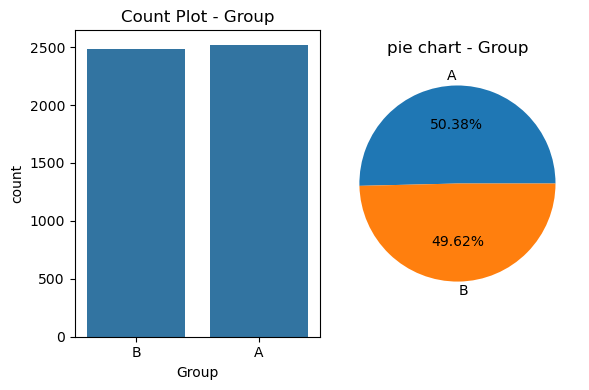

In [77]:
#import matplotlib.pyplot as plt
#import seaborn as sns
variable = 'Group'

plt.figure(figsize = (6,4))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= selected_df_subset)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts = selected_df_subset[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

plt.tight_layout()

plt.show()

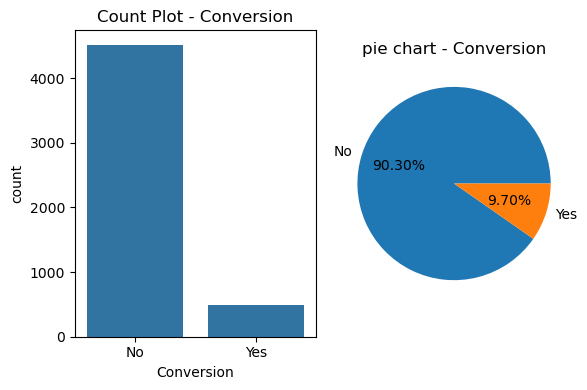

In [79]:
variable = 'Conversion'

plt.figure(figsize = (6,4))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= selected_df_subset)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts = selected_df_subset[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

plt.tight_layout()

plt.show()

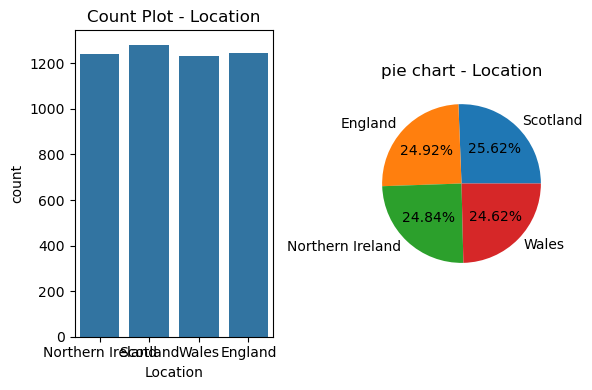

In [81]:
variable = 'Location'

plt.figure(figsize = (6,4))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= selected_df_subset)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts = selected_df_subset[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

plt.tight_layout()

plt.show()

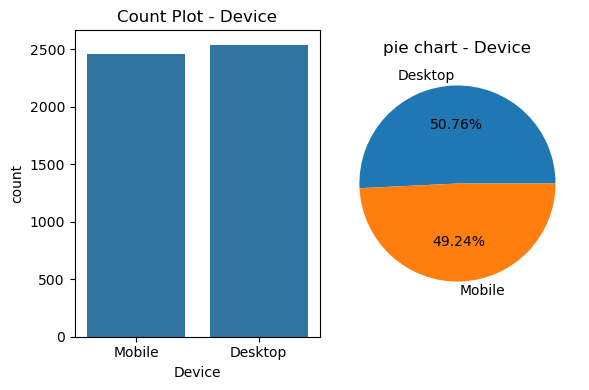

In [85]:
variable = 'Device'

plt.figure(figsize = (6,4))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= selected_df_subset)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts = selected_df_subset[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

plt.tight_layout()

plt.show()

In [95]:
print(selected_df_subset.columns)

Index(['Group', 'Conversion', 'Device', 'Location'], dtype='object')


In [101]:
ct_conversion_group = pd.crosstab(selected_df_subset['Group'], selected_df_subset['Conversion'], normalize = 'index')
ct_conversion_group

Conversion,No,Yes
Group,,
A,0.946010,0.053990
B,0.859331,0.140669


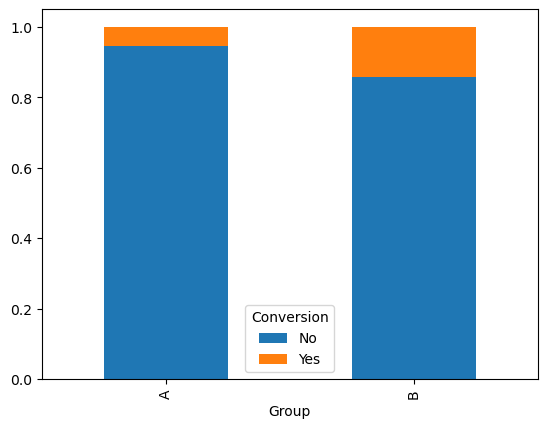

In [103]:
ct_conversion_group.plot.bar(stacked = True);

Conversion              No       Yes
Location                            
England           0.890851  0.109149
Wales             0.901706  0.098294
Scotland          0.902420  0.097580
Northern Ireland  0.917069  0.082931


<Axes: xlabel='Location'>

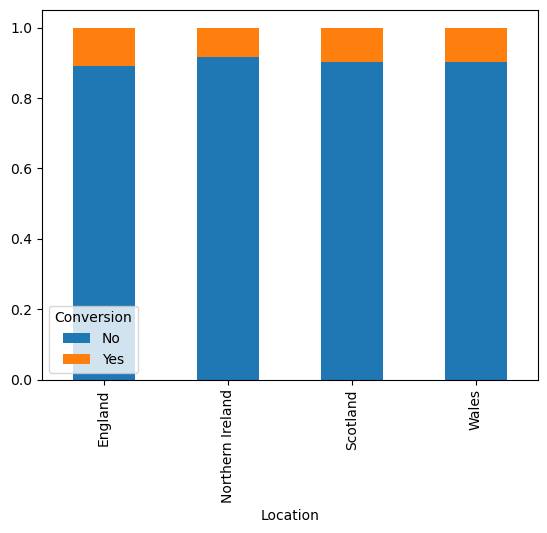

In [111]:
ct_conversion_group = pd.crosstab(selected_df_subset['Location'], selected_df_subset['Conversion'], normalize = 'index')
print(ct_conversion_group.sort_values(by = 'Yes', ascending = False)) # Changed variable name to ct_conversion_group
ct_conversion_group.plot.bar(stacked = True)                         # Changed variable name to ct_conversion_group

Conversion        No       Yes
Device                        
Desktop     0.900315  0.099685
Mobile      0.905768  0.094232


<Axes: xlabel='Device'>

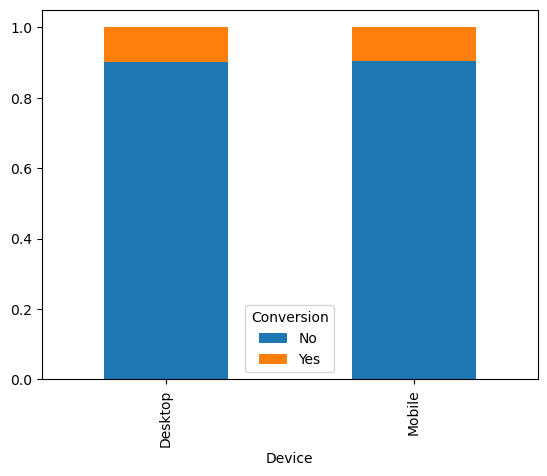

In [113]:
ct_conversion_group = pd.crosstab(selected_df_subset['Device'], selected_df_subset['Conversion'], normalize = 'index')
print(ct_conversion_group.sort_values(by = 'Yes', ascending = False)) 
ct_conversion_group.plot.bar(stacked = True)                         

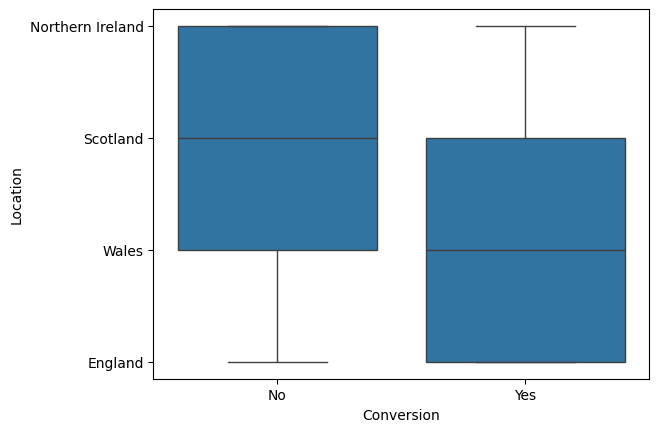

In [117]:
sns.boxplot(x = 'Conversion', y= 'Location', data = selected_df_subset);

In [123]:
#stastical test
from scipy.stats import chi2_contingency
alpha = 0.05
categorical_variables_to_test = ['Group', 'Device', 'Location']
for variable in categorical_variables_to_test:
    contingency_table = pd.crosstab(df[variable], df['Conversion'])
    chi2, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(contingency_table)
    print(f"\n--- Chi-squared test for {variable} vs. Conversion ---")
    print(f"Contingency Table:\n{contingency_table}")
    print(f"Chi-squared statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print(f"Conclusion: Reject the Null Hypothesis. The difference in conversion rates across '{variable}' is statistically significant.")
        print(f"This suggests that '{variable}' has a significant relationship with conversion.")
    else:
        print(f"Conclusion: Fail to Reject the Null Hypothesis. There is no statistically significant difference in conversion rates across '{variable}'.")
        print(f"This suggests that '{variable}' does not have a significant relationship with conversion.")



--- Chi-squared test for Group vs. Conversion ---
Contingency Table:
Conversion    No  Yes
Group                
A           2383  136
B           2132  349
Chi-squared statistic: 106.2281
P-value: 0.0000
Conclusion: Reject the Null Hypothesis. The difference in conversion rates across 'Group' is statistically significant.
This suggests that 'Group' has a significant relationship with conversion.

--- Chi-squared test for Device vs. Conversion ---
Contingency Table:
Conversion    No  Yes
Device               
Desktop     2285  253
Mobile      2230  232
Chi-squared statistic: 0.3642
P-value: 0.5462
Conclusion: Fail to Reject the Null Hypothesis. There is no statistically significant difference in conversion rates across 'Device'.
This suggests that 'Device' does not have a significant relationship with conversion.

--- Chi-squared test for Location vs. Conversion ---
Contingency Table:
Conversion          No  Yes
Location                   
England           1110  136
Northern Ireland 